In [8]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

# from generators import DiagBooleanMatrix, ArbiBooleanMatrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from models.cmf_vincent.anewton import *
from models.cmf_vincent.utils import *
from models.cmf_vincent.cmf import *

import numpy
import time
import logging
import scipy.sparse
# import argparse
# from .anewton import *
# from .utils import *


In [12]:
[Xs_trn, Xs_tst, rc_schema, modes] = read_triple_data(args.train, args.test, args.user, args.item, args.link, args.boolean)
Xs_trn

[<6040x3883 sparse matrix of type '<class 'numpy.int32'>'
 	with 900188 stored elements in Compressed Sparse Column format>,
 <3883x99 sparse matrix of type '<class 'numpy.float64'>'
 	with 10291 stored elements in Compressed Sparse Column format>]

In [21]:
[Xs_trn, Xs_tst, rc_schema, modes] = read_triple_data(args.train, args.test, args.user, args.item, args.link, args.boolean)

from datasets import CustomData, Dataset



X_data = CustomData(X=Xs_trn[0], X_name='X', U_name='U', V_name='V')
Z_data = CustomData(X=Xs_trn[1].T, X_name='X', U_name='U', V_name='V')

# down-sampling by random

idx_u = X_data.sample(n=1000, axis=0)
print(X_data.X.shape)
idx_v = X_data.sample(n=500, axis=1)
print(X_data.X.shape)
Z_data.sample(idx=idx_v, axis=1)
print(Z_data.X.shape)

[I] sampling to size 1000
[I]   Data seed    : 1701412119
(1000, 3883)
[I] sampling to size 500
(1000, 500)
[I] sampling with given indices
(99, 500)


[I] Summary of X(1000, 500):
[I]   row/col mean (33.0, 16.5), row/col median (16.0, 9.0)


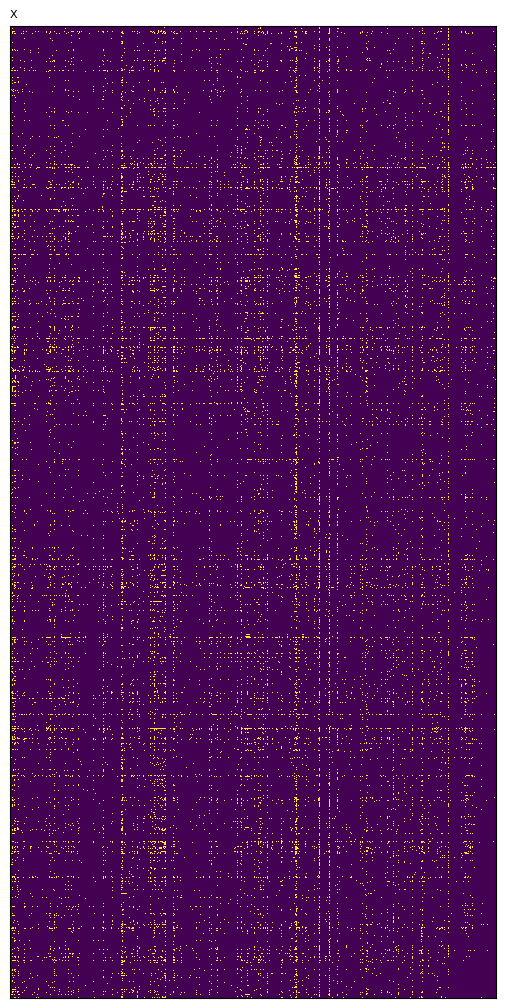

[I] Summary of X(99, 500):
[I]   row/col mean (2.6, 13.2), row/col median (2.0, 3.0)


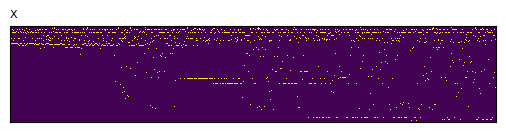

In [22]:
# without splitting
X_dataset = Dataset()
X_dataset.load_data(X=X_data)

Z_dataset = Dataset()
Z_dataset.load_data(X=Z_data)

X_dataset.summarize(display=True)
Z_dataset.summarize(display=True)

[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.7, 0.3]
[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.7, 0.3]
[I] display : False
[W] Missing validation set.


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False
[W] Missing validation set.


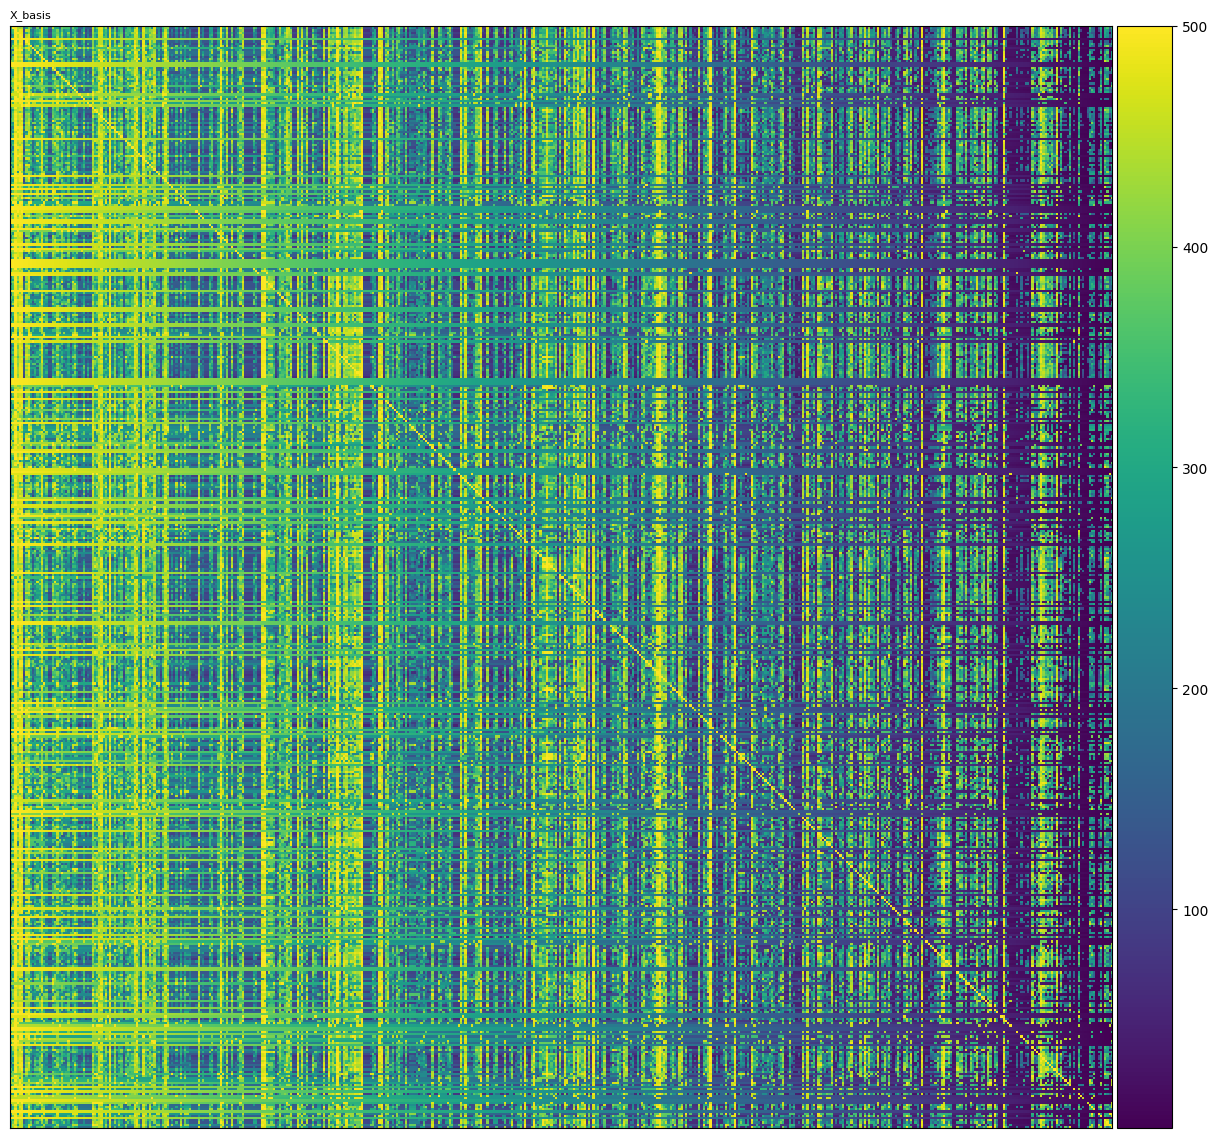

[I] display : False
[W] Missing validation set.
[I] display : False
[W] Missing validation set.


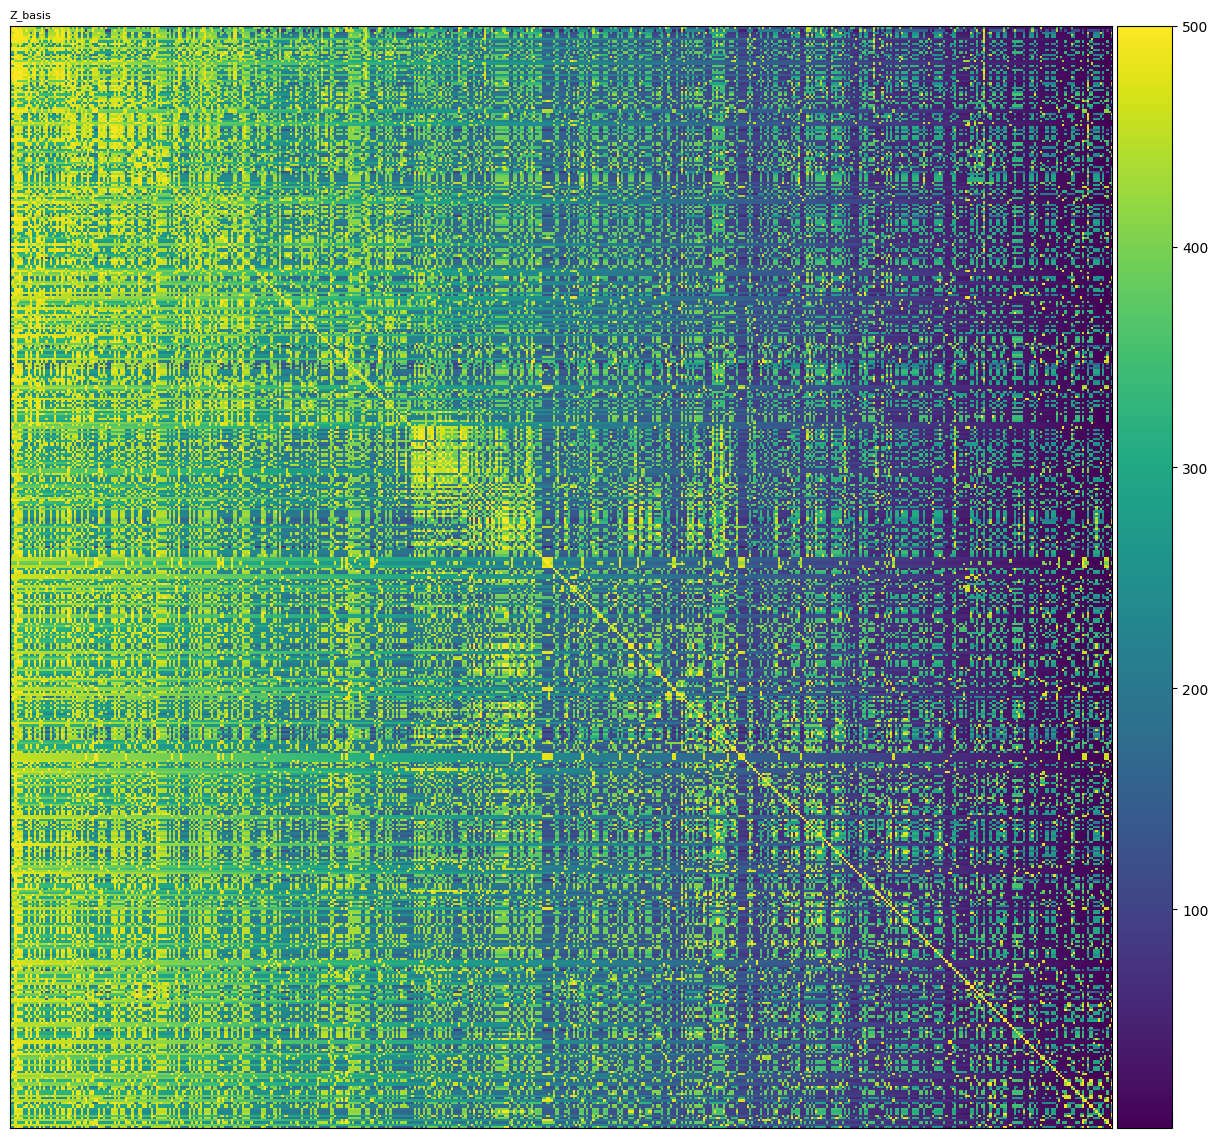

In [23]:
# AssoQuant

from models import Asso, AssoQuant
from utils import show_matrix, check_sparse

k = 5
tau = 0.20
w = [0.7, 0.3]

n_col = 500

asso = Asso(k=k, tau=tau, w=w)
aq = AssoQuant(k=k, tau=tau, w=w)

asso._fit_prepare(train_set=X_dataset, display=False)
X_assoc = check_sparse(asso.assoc, sparse=False)
X_basis_asso = check_sparse(asso.basis, sparse=False)
# settings = [(X_basis, [0, 0], 'X_basis ASSO')]
# show_matrix(settings=settings, colorbar=True)

aq._fit_prepare(train_set=X_dataset, display=False)
X_basis = aq.basis
settings = [(n_col - aq.basis + 1, [0, 0], 'X_basis')]
show_matrix(settings=settings, colorbar=True)

#

asso._fit_prepare(train_set=Z_dataset, display=False)
Z_assoc = check_sparse(asso.assoc, sparse=False)
Z_basis_asso = check_sparse(asso.basis, sparse=False)
# settings = [(Z_basis, [0, 0], 'Z_basis ASSO')]
# show_matrix(settings=settings, colorbar=True)

aq._fit_prepare(train_set=Z_dataset, display=False)
Z_basis = aq.basis
settings = [(n_col - aq.basis + 1, [0, 0], 'Z_basis')]
show_matrix(settings=settings, colorbar=True)

In [52]:
class Args():
    def __init__(self, k, iter, user=0, item=0):
        self.train = "../models/cmf_vincent/data/ml-1m/train.txt"
        self.test = "../models/cmf_vincent/data/ml-1m/test.txt"
        self.item = "../models/cmf_vincent/data/ml-1m/item.txt" if item > 0 else ""
        self.user = "../models/cmf_vincent/data/ml-1m/user.txt" if user > 0 else ""
        self.out = "../output/out-cmf.txt"
        self.link = 'log_dense'
        self.alphas = '0.4'
        if user > 0:
            self.alphas += '-' + str(user)
        if item > 0:
            self.alphas += '-' + str(item)
        self.k = k
        self.reg = 0.1
        self.lr = 0.1
        self.iter = iter
        self.tol = 0.0
        self.verbose = True
        self.boolean = True
        
args = Args(k=40, iter=150, user=0, item=0.2)

[INFO] ------------------- CMF -------------------
[INFO] Data: Number of instnace for each entity = [1000, 500, 99]
[INFO] Data: Training size = 16490. Testing size = 1678
[INFO] Settings: k = 40. reg = 0.1. lr = 0.1. alpha = [0.4, 0.2]. modes = ['sparse', 'log_dense'].
[INFO] Iter 1/150. Time: 0.3
[INFO] Training Loss: 9081.4 (change -6.31%). Training RMSE: 1.00. Testing RMSE: 1.00
[INFO] Training TPR: 0.00. Testing TPR: 0.00
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 2/150. Time: 0.3
[INFO] Training Loss: 8408.9 (change -7.41%). Training RMSE: 1.00. Testing RMSE: 1.00
[INFO] Training TPR: 0.00. Testing TPR: 0.00
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 3/150. Time: 0.2
[INFO] Training Loss: 7870.3 (change -6.40%). Training RMSE: 1.00. Testing RMSE: 1.00
[INFO] Training TPR: 0.00. Testing TPR: 0.00
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 4/150. Time: 0.3
[INFO] Training Loss: 7489.2 (change -4.84%). Training RMSE: 1.00. Testing RMSE: 1.0

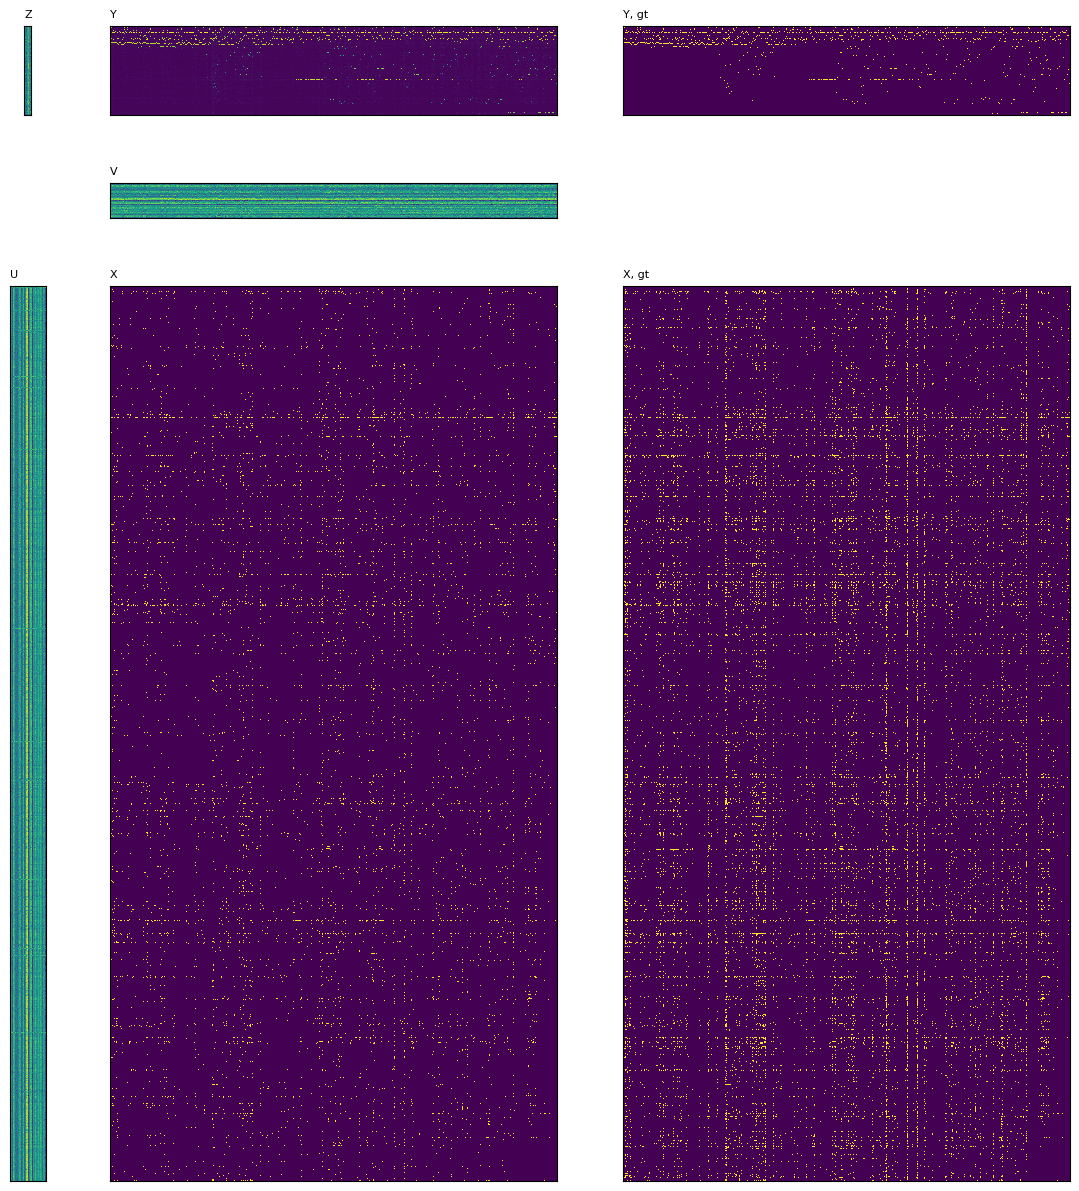

[INFO] Iter 20/150. Time: 0.7
[INFO] Training Loss: 3735.8 (change -5.14%). Training RMSE: 0.75. Testing RMSE: 0.88
[INFO] Training TPR: 0.44. Testing TPR: 0.23
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 21/150. Time: 0.3
[INFO] Training Loss: 3561.4 (change -4.67%). Training RMSE: 0.73. Testing RMSE: 0.86
[INFO] Training TPR: 0.46. Testing TPR: 0.26
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 22/150. Time: 0.3
[INFO] Training Loss: 3399.7 (change -4.54%). Training RMSE: 0.72. Testing RMSE: 0.85
[INFO] Training TPR: 0.49. Testing TPR: 0.28
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 23/150. Time: 0.3
[INFO] Training Loss: 3258.0 (change -4.17%). Training RMSE: 0.70. Testing RMSE: 0.84
[INFO] Training TPR: 0.51. Testing TPR: 0.29
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 24/150. Time: 0.3
[INFO] Training Loss: 3146.0 (change -3.44%). Training RMSE: 0.69. Testing RMSE: 0.83
[INFO] Training TPR: 0.53. Testing TPR: 0.30
[INFO] Training

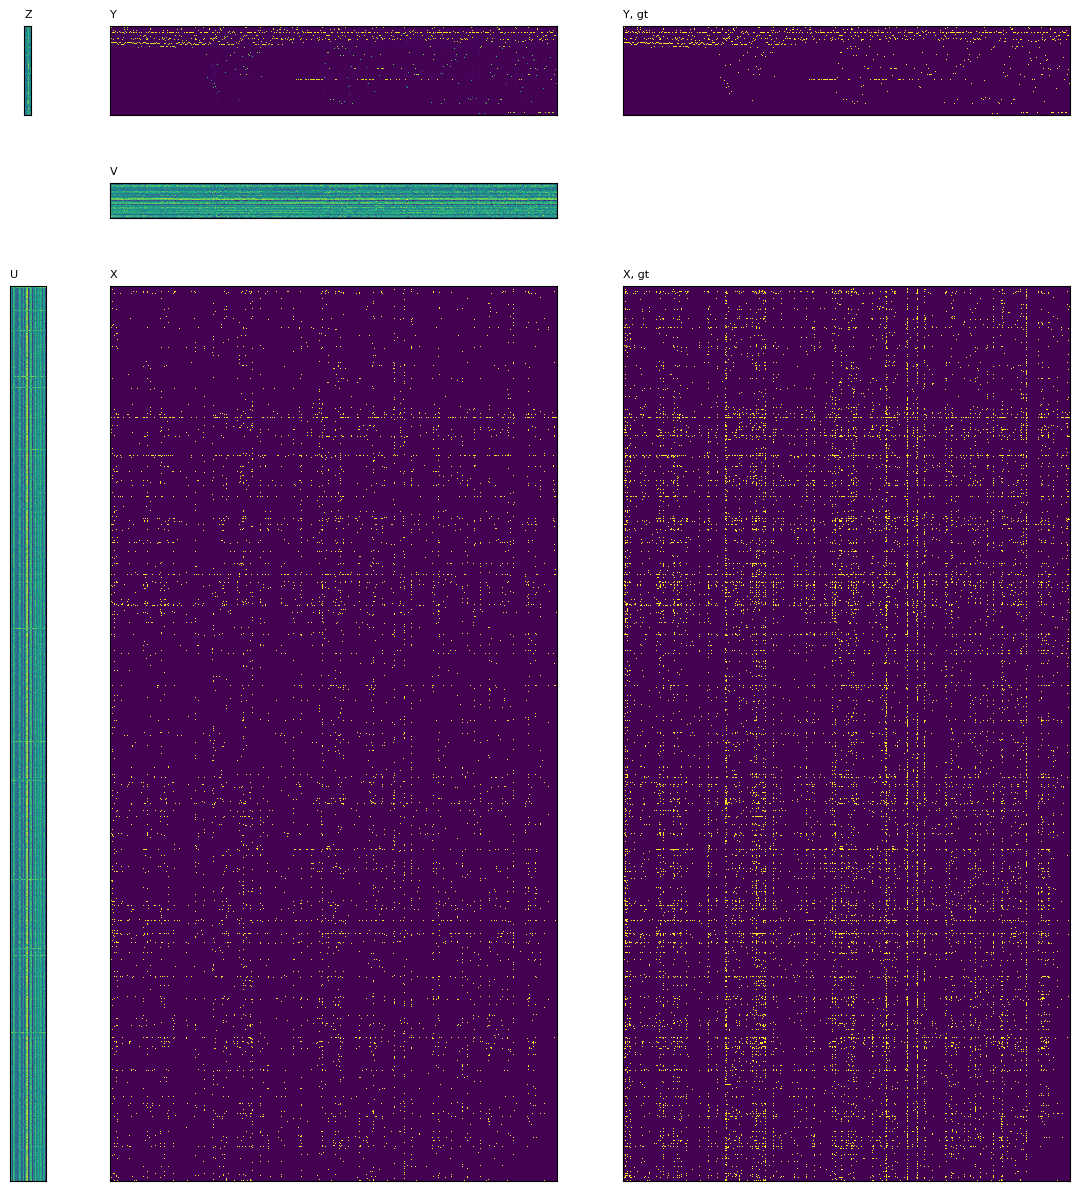

[INFO] Iter 40/150. Time: 0.8
[INFO] Training Loss: 3904.4 (change 4.75%). Training RMSE: 0.77. Testing RMSE: 0.84
[INFO] Training TPR: 0.41. Testing TPR: 0.29
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 41/150. Time: 0.3
[INFO] Training Loss: 4065.4 (change 4.12%). Training RMSE: 0.78. Testing RMSE: 0.85
[INFO] Training TPR: 0.39. Testing TPR: 0.28
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 42/150. Time: 0.2
[INFO] Training Loss: 4232.1 (change 4.10%). Training RMSE: 0.80. Testing RMSE: 0.85
[INFO] Training TPR: 0.36. Testing TPR: 0.27
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 43/150. Time: 0.2
[INFO] Training Loss: 4369.1 (change 3.24%). Training RMSE: 0.81. Testing RMSE: 0.86
[INFO] Training TPR: 0.34. Testing TPR: 0.27
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 44/150. Time: 0.3
[INFO] Training Loss: 4494.6 (change 2.87%). Training RMSE: 0.82. Testing RMSE: 0.86
[INFO] Training TPR: 0.32. Testing TPR: 0.26
[INFO] Training FPR:

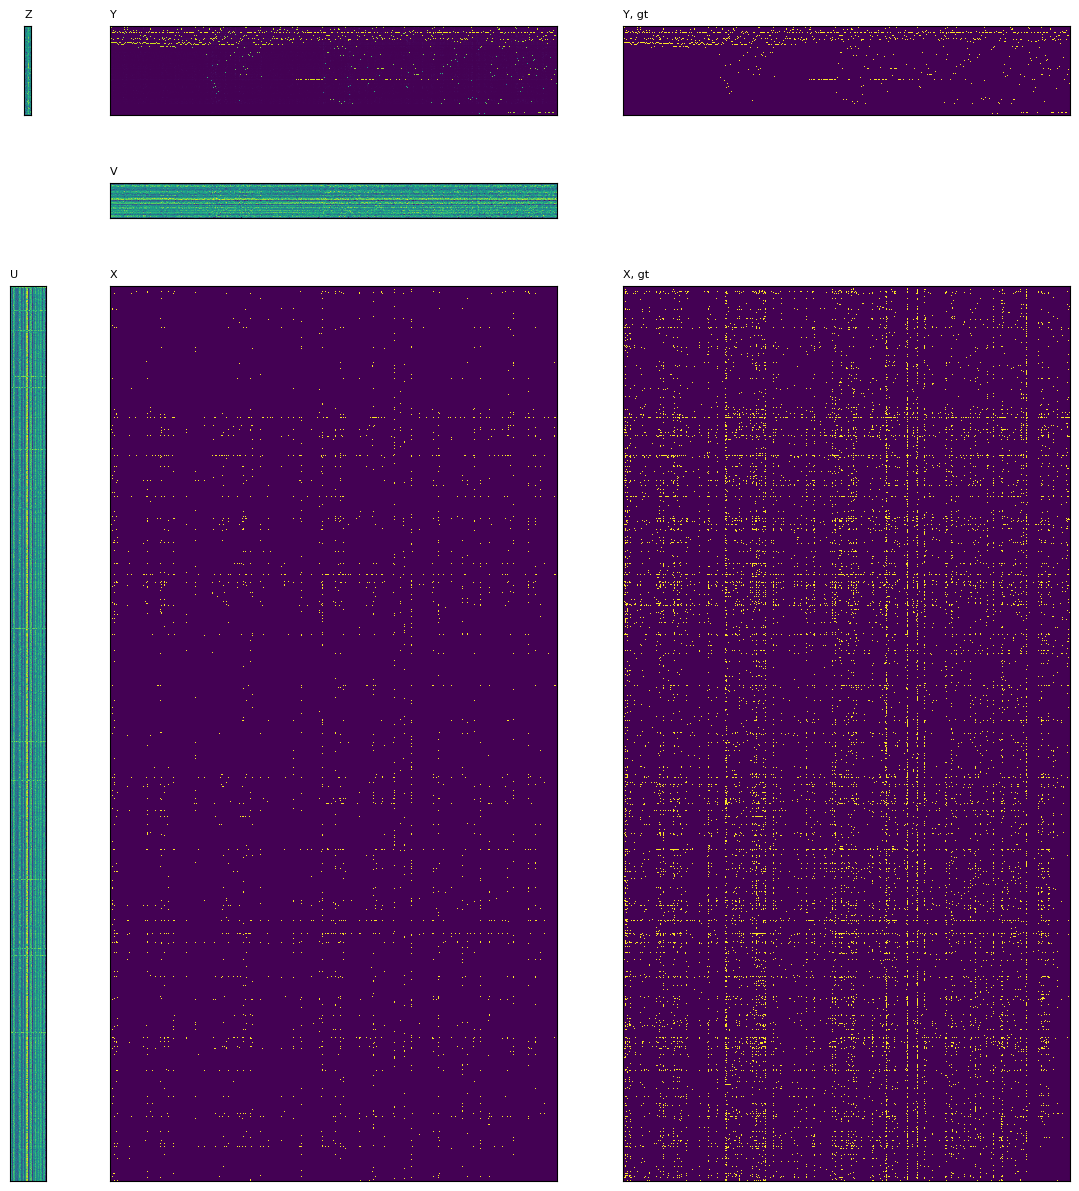

[INFO] Iter 60/150. Time: 0.7
[INFO] Training Loss: 5355.9 (change 0.41%). Training RMSE: 0.90. Testing RMSE: 0.92
[INFO] Training TPR: 0.19. Testing TPR: 0.15
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 61/150. Time: 0.2
[INFO] Training Loss: 5374.7 (change 0.35%). Training RMSE: 0.90. Testing RMSE: 0.92
[INFO] Training TPR: 0.19. Testing TPR: 0.15
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 62/150. Time: 0.3
[INFO] Training Loss: 5392.3 (change 0.33%). Training RMSE: 0.90. Testing RMSE: 0.92
[INFO] Training TPR: 0.18. Testing TPR: 0.15
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 63/150. Time: 0.3
[INFO] Training Loss: 5403.5 (change 0.21%). Training RMSE: 0.90. Testing RMSE: 0.92
[INFO] Training TPR: 0.18. Testing TPR: 0.15
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 64/150. Time: 0.3
[INFO] Training Loss: 5419.0 (change 0.29%). Training RMSE: 0.91. Testing RMSE: 0.93
[INFO] Training TPR: 0.18. Testing TPR: 0.14
[INFO] Training FPR:

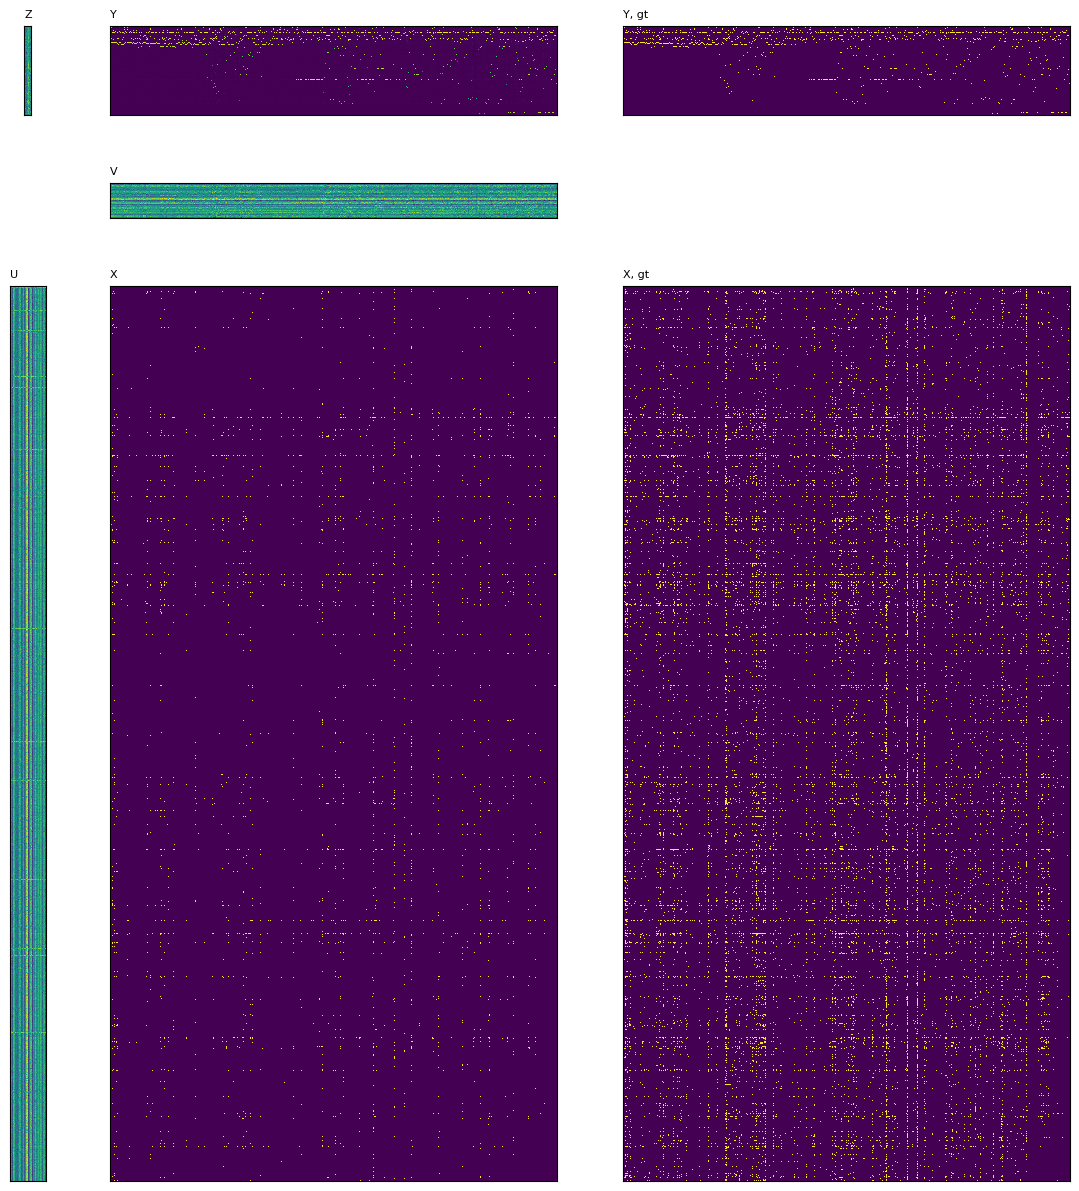

[INFO] Iter 80/150. Time: 0.7
[INFO] Training Loss: 5461.6 (change -0.10%). Training RMSE: 0.91. Testing RMSE: 0.94
[INFO] Training TPR: 0.17. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 81/150. Time: 0.3
[INFO] Training Loss: 5454.8 (change -0.12%). Training RMSE: 0.91. Testing RMSE: 0.94
[INFO] Training TPR: 0.17. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 82/150. Time: 0.3
[INFO] Training Loss: 5456.8 (change 0.04%). Training RMSE: 0.91. Testing RMSE: 0.94
[INFO] Training TPR: 0.17. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 83/150. Time: 0.3
[INFO] Training Loss: 5452.0 (change -0.09%). Training RMSE: 0.91. Testing RMSE: 0.94
[INFO] Training TPR: 0.17. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 84/150. Time: 0.3
[INFO] Training Loss: 5451.9 (change -0.00%). Training RMSE: 0.91. Testing RMSE: 0.94
[INFO] Training TPR: 0.17. Testing TPR: 0.12
[INFO] Training 

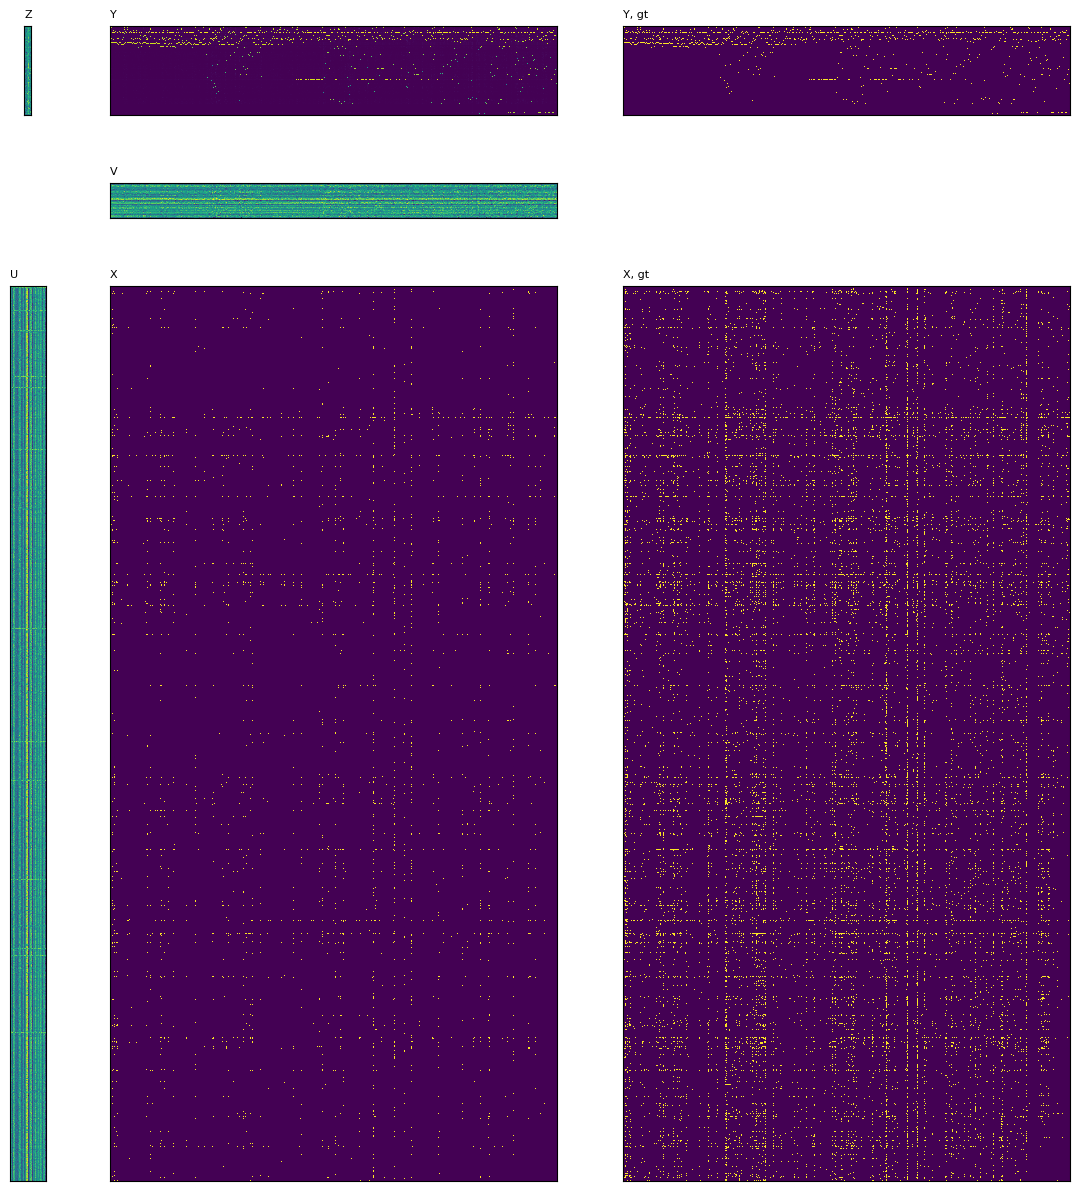

[INFO] Iter 100/150. Time: 0.9
[INFO] Training Loss: 5387.5 (change -0.02%). Training RMSE: 0.90. Testing RMSE: 0.94
[INFO] Training TPR: 0.18. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 101/150. Time: 0.3
[INFO] Training Loss: 5382.2 (change -0.10%). Training RMSE: 0.90. Testing RMSE: 0.94
[INFO] Training TPR: 0.19. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 102/150. Time: 0.3
[INFO] Training Loss: 5379.0 (change -0.06%). Training RMSE: 0.90. Testing RMSE: 0.94
[INFO] Training TPR: 0.19. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 103/150. Time: 0.3
[INFO] Training Loss: 5375.4 (change -0.07%). Training RMSE: 0.90. Testing RMSE: 0.94
[INFO] Training TPR: 0.19. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 104/150. Time: 0.3
[INFO] Training Loss: 5372.2 (change -0.06%). Training RMSE: 0.90. Testing RMSE: 0.94
[INFO] Training TPR: 0.19. Testing TPR: 0.12
[INFO] Tra

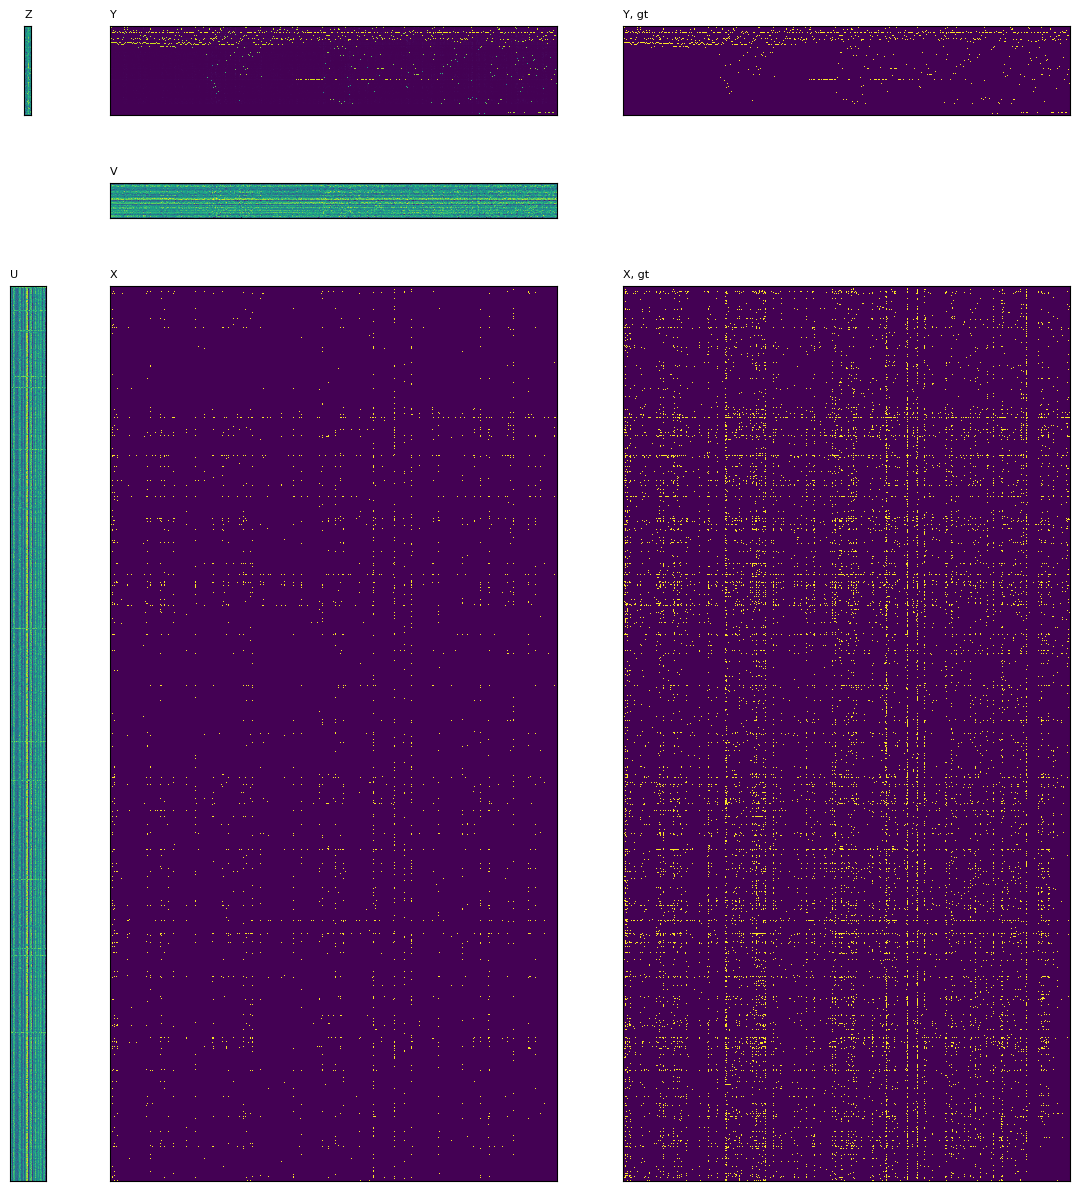

[INFO] Iter 120/150. Time: 0.8
[INFO] Training Loss: 5326.2 (change -0.05%). Training RMSE: 0.90. Testing RMSE: 0.94
[INFO] Training TPR: 0.19. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 121/150. Time: 0.3
[INFO] Training Loss: 5323.4 (change -0.05%). Training RMSE: 0.90. Testing RMSE: 0.94
[INFO] Training TPR: 0.19. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 122/150. Time: 0.2
[INFO] Training Loss: 5319.0 (change -0.08%). Training RMSE: 0.90. Testing RMSE: 0.94
[INFO] Training TPR: 0.19. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 123/150. Time: 0.2
[INFO] Training Loss: 5314.6 (change -0.08%). Training RMSE: 0.90. Testing RMSE: 0.94
[INFO] Training TPR: 0.20. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 124/150. Time: 0.2
[INFO] Training Loss: 5307.8 (change -0.13%). Training RMSE: 0.90. Testing RMSE: 0.94
[INFO] Training TPR: 0.20. Testing TPR: 0.12
[INFO] Tra

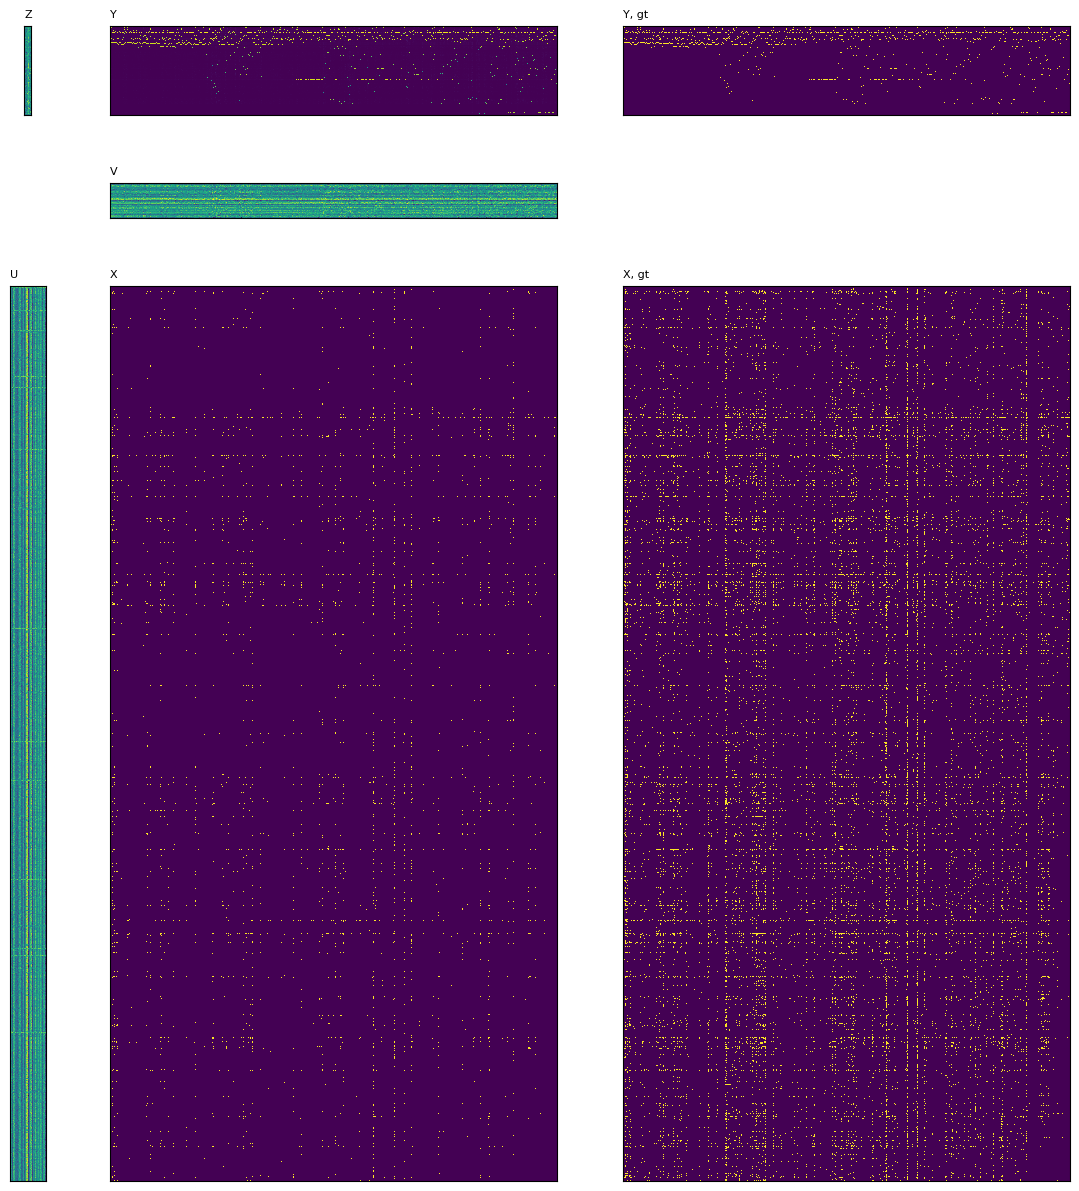

[INFO] Iter 140/150. Time: 0.7
[INFO] Training Loss: 5277.7 (change -0.02%). Training RMSE: 0.89. Testing RMSE: 0.94
[INFO] Training TPR: 0.20. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 141/150. Time: 0.2
[INFO] Training Loss: 5278.1 (change 0.01%). Training RMSE: 0.89. Testing RMSE: 0.94
[INFO] Training TPR: 0.20. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 142/150. Time: 0.3
[INFO] Training Loss: 5275.3 (change -0.05%). Training RMSE: 0.89. Testing RMSE: 0.94
[INFO] Training TPR: 0.20. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 143/150. Time: 0.3
[INFO] Training Loss: 5273.7 (change -0.03%). Training RMSE: 0.89. Testing RMSE: 0.94
[INFO] Training TPR: 0.20. Testing TPR: 0.12
[INFO] Training FPR: 0.00. Testing FPR: 0.00
[INFO] Iter 144/150. Time: 0.3
[INFO] Training Loss: 5270.9 (change -0.05%). Training RMSE: 0.89. Testing RMSE: 0.94
[INFO] Training TPR: 0.20. Testing TPR: 0.12
[INFO] Trai

In [53]:
import numpy as np

[Xs_trn, Xs_tst, rc_schema, modes] = read_triple_data(args.train, args.test, args.user, args.item, args.link, args.boolean)

Xs_tst[0] = Xs_tst[0][idx_u][:, idx_v]

Xs_trn[0] = Xs_trn[0][idx_u][:, idx_v]
Xs_trn[1] = Xs_trn[1][idx_v]

if(args.verbose == 1):
    logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')
else:
    logging.basicConfig(level=logging.WARNING, format='[%(levelname)s] %(message)s')

logger = logging.getLogger()
[S, Ns] = get_config(Xs_trn, rc_schema)
alphas = string2list(args.alphas, len(modes))

logger.info('------------------- CMF -------------------')
logger.info('Data: Number of instnace for each entity = {}'.format(list(Ns)))
logger.info('Data: Training size = {}. Testing size = {}'.format(Xs_trn[0].size, Xs_tst[0].size))
logger.info('Settings: k = {}. reg = {}. lr = {}. alpha = {}. modes = {}.'.format(args.k, args.reg, args.lr, alphas, modes))

run_cmf(Xs_trn, Xs_tst, rc_schema, modes, alphas, args, logger)